<a href="https://colab.research.google.com/github/SejalLambat19/Internship/blob/main/task%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


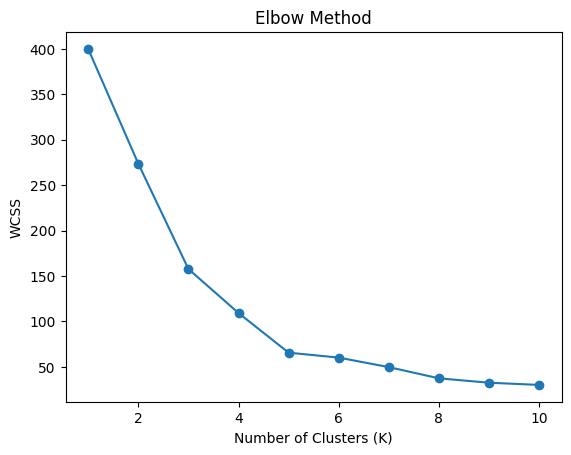

In [7]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()


In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)

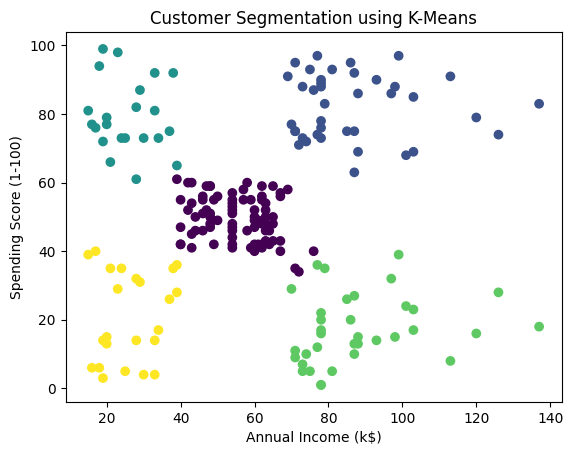

In [12]:
plt.figure()
plt.scatter(dataset['Annual Income (k$)'],
            dataset['Spending Score (1-100)'],
            c=dataset['Cluster'])

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.show()

In [15]:
print(dataset.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
